In [323]:
from bayes_opt import BayesianOptimization
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import mlab
from matplotlib import gridspec
%matplotlib inline

In [372]:
def target(x, y):
    a = np.exp(-( (x - 2)**2/0.7 + (y - 4)**2/1.2) + (x - 2)*(y - 4)/1.6 )
    b = np.exp(-( (x - 4)**2/3 + (y - 2)**2/2.) )
    c = np.exp(-( (x - 4)**2/0.5 + (y - 4)**2/0.5) + (x - 4)*(y - 4)/0.5 )
    d = np.sin(3.1415 * x)
    e = np.exp(-( (x - 5.5)**2/0.5 + (y - 5.5)**2/.5) )
    return 2*a + b - c + 0.17 * d + 2*e

In [373]:
n = 1e5
x = y = np.linspace(0, 6, 300)
X, Y = np.meshgrid(x, y)
x = X.ravel()
y = Y.ravel()
X = np.vstack([x, y]).T[:, [1, 0]]
z = target(x, y)

In [374]:
max(z)

2.0642339183485188

/Users/fmfnogueira/venvs3/general/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


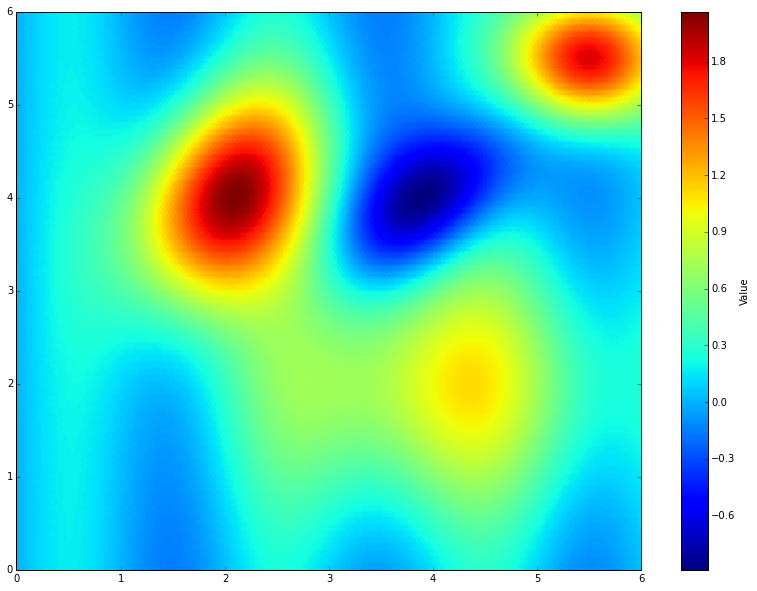

In [375]:
fig, axis = plt.subplots(1, 1, figsize=(14, 10))
gridsize=150

im = axis.hexbin(x, y, C=z, gridsize=gridsize, cmap=cm.jet, bins=None)
axis.axis([x.min(), x.max(), y.min(), y.max()])

cb = fig.colorbar(im)
cb.set_label('Value')

In [376]:
def posterior(bo, X):
    bo.gp.fit(bo.X, bo.Y)
    mu, sigma2 = bo.gp.predict(X, eval_MSE=True)
    return mu, np.sqrt(sigma2), bo.util.utility(X, bo.gp, 0)

In [381]:
bo = BayesianOptimization(target, {'x': (0, 6), 'y': (0, 6)})

In [384]:
gp_params = {'corr': 'absolute_exponential', 'nugget': 1e-4}
bo.maximize(init_points=3, n_iter=150, acq='ucb', kappa=10, **gp_params)

Iteration:   1 | Last sampled value:    1.435187 | with parameters:  {'y': 3.296961479972615, 'x': 2.0622590000906658}
               | Current maximum:       2.032958 | with parameters:  {'y': 3.9179958704258957, 'x': 2.1611928591315124}
               | Time taken: 0 minutes and 1.033611 seconds

Iteration:   2 | Last sampled value:    0.025295 | with parameters:  {'y': 2.8348090894937039, 'x': 0.021593763360555341}
               | Current maximum:       2.032958 | with parameters:  {'y': 3.9179958704258957, 'x': 2.1611928591315124}
               | Time taken: 0 minutes and 0.999194 seconds

Iteration:   3 | Last sampled value:    0.926307 | with parameters:  {'y': 5.1605403329337305, 'x': 5.033144615930536}
               | Current maximum:       2.032958 | with parameters:  {'y': 3.9179958704258957, 'x': 2.1611928591315124}
               | Time taken: 0 minutes and 0.956068 seconds

Iteration:   4 | Last sampled value:    1.958828 | with parameters:  {'y': 4.2768694040767947, 'x

[0.0, 6.0, 0.0, 6.0]

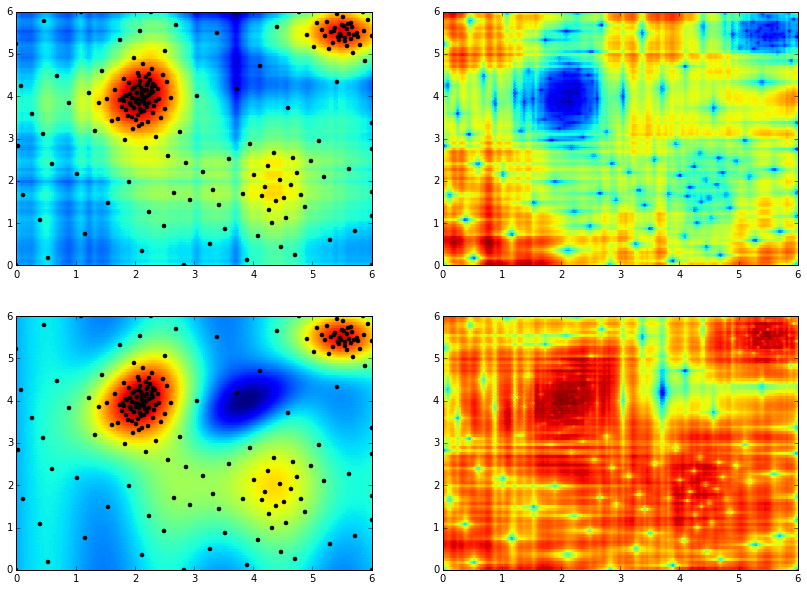

In [385]:
mu, s, ut = posterior(bo, X)

fig, ax = plt.subplots(2, 2, figsize=(14, 10))
gridsize=150

im = ax[0][0].hexbin(x, y, C=mu, gridsize=gridsize, cmap=cm.jet, bins=None)
ax[0][0].axis([x.min(), x.max(), y.min(), y.max()])
ax[0][0].plot(bo.X[:, 1], bo.X[:, 0], 'o', markersize=4, c='k')

ax[0][1].hexbin(x, y, C=s, gridsize=gridsize, cmap=cm.jet, bins=None)
ax[0][1].axis([x.min(), x.max(), y.min(), y.max()])

ax[1][0].hexbin(x, y, C=z, gridsize=gridsize, cmap=cm.jet, bins=None)
ax[1][0].axis([x.min(), x.max(), y.min(), y.max()])
ax[1][0].plot(bo.X[:, 1], bo.X[:, 0], 'o', markersize=4, c='k')

ax[1][1].hexbin(x, y, C=ut, gridsize=gridsize, cmap=cm.jet, bins=None)
ax[1][1].axis([x.min(), x.max(), y.min(), y.max()])

# cb = fig.colorbar(im)
# cb.set_label('Value')